In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/customer_churn.csv')
label_encoders = {}


In [ ]:
data.head(10)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
5,Jessica Williams,48.0,10356.02,0,5.12,8.0,2009-03-03 23:13:37,"6187 Olson Mountains East Vincentborough, PR 7...",Kelly-Warren,1
6,Eric Butler,44.0,11331.58,1,5.23,11.0,2016-12-05 03:35:43,"4846 Savannah Road West Justin, IA 87713-3460",Reynolds-Sheppard,1
7,Zachary Walsh,32.0,9885.12,1,6.92,9.0,2006-03-09 14:50:20,"25271 Roy Expressway Suite 147 Brownport, FM 5...",Singh-Cole,1
8,Ashlee Carr,43.0,14062.60,1,5.46,11.0,2011-09-29 05:47:23,"3725 Caroline Stravenue South Christineview, M...",Lopez PLC,1
9,Jennifer Lynch,40.0,8066.94,1,7.11,11.0,2006-03-28 15:42:45,"363 Sandra Lodge Suite 144 South Ann, WI 51655...",Reed-Martinez,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
data.drop(['Company', 'Location', 'Names', 'Onboard_date'], axis=1, inplace=True)

In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

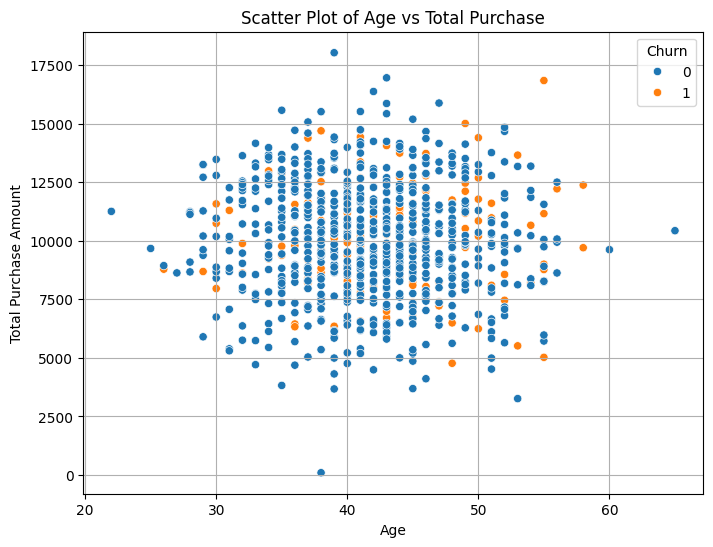

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Total_Purchase', hue='Churn', data=data)
plt.title('Scatter Plot of Age vs Total Purchase')
plt.xlabel('Age')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Churn', loc='upper right')
plt.grid(True)
plt.show()

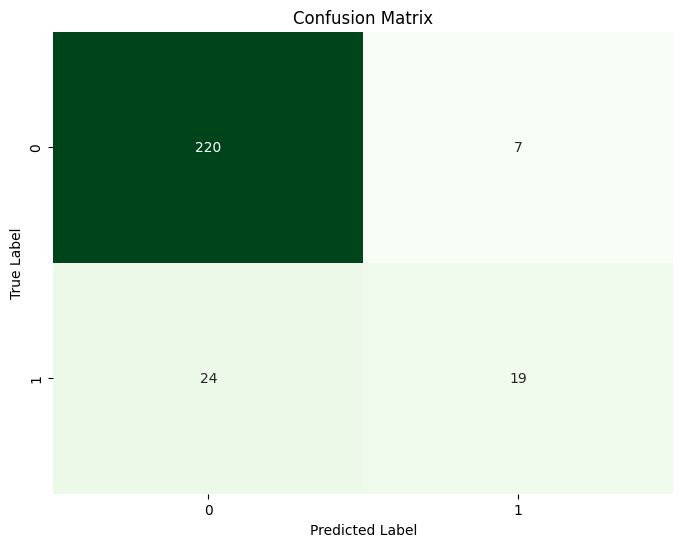

In [ ]:
y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8851851851851852
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       227
           1       0.73      0.44      0.55        43

    accuracy                           0.89       270
   macro avg       0.82      0.71      0.74       270
weighted avg       0.87      0.89      0.87       270

Confusion Matrix:
 [[220   7]
 [ 24  19]]


In [ ]:
def predict_churn():
    print("Enter customer details for churn prediction:")
    user_input = {}
    user_input['Age'] = int(input("Age: "))
    user_input['Total_Purchase'] = float(input("Total Purchase Amount: "))
    user_input['Account_Manager'] = int(input("Account Manager (1 for Yes, 0 for No): "))
    user_input['Years'] = int(input("Years as Customer: "))
    user_input['Num_Sites'] = int(input("Number of Sites Used: "))

    # Create a DataFrame from user input
    user_data = pd.DataFrame(user_input, index=[0])

    # Make prediction
    prediction = rf_classifier.predict(user_data)
    if prediction[0] == 1:
        print("Churn Prediction: Churn")
    else:
        print("Churn Prediction: Not Churn")
# Call the function to make a prediction based on user input
predict_churn()

Enter customer details for churn prediction:
Age: 21
Total Purchase Amount: 32000
Account Manager (1 for Yes, 0 for No): 1
Years as Customer: 2
Number of Sites Used: 3
Churn Prediction: Not Churn
